Practice Project - 4

Abalone Case Study
Problem Statement:
The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- a boring and time-consuming task. Other measurements, which are easier to obtain, are used to predict the age. Further information, such as weather patterns and location (hence food availability) may be required to solve the problem.

Attribute Information

Given is the attribute name, attribute type, the measurement unit and a brief description. The number of rings is the value to predict. 

Name / Data Type / Measurement Unit / Description
-----------------------------
Sex / nominal / -- / M, F, and I (infant)
Length / continuous / mm / Longest shell measurement
Diameter / continuous / mm / perpendicular to length
Height / continuous / mm / with meat in shell
Whole weight / continuous / grams / whole abalone
Shucked weight / continuous / grams / weight of meat
Viscera weight / continuous / grams / gut weight (after bleeding)
Shell weight / continuous / grams / after being dried
Rings / integer / -- / +1.5 gives the age in years. 

You have to predict the rings of each abalone which will lead us to the age of that abalone. 

Downlaod Files:
https://github.com/dsrscientist/dataset1/blob/master/abalone.csv

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing data
df=pd.read_csv("abalone.csv")
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Since my target variable i.e., Age is a continuous type of data above problem is a regression problem. And i have to use all regression algorithms and regression matrics.

And i have to extract Age column using Rings column by adding 1.5 to ring number.

# EDA:

In [3]:
df.shape

(4177, 9)

I can find 4177 rows and 9 columns in my dataset.

In [4]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

All the column names as list are given in above output.

In [5]:
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

We can observe Sex column is object type data,Rings is integer type data and all other features are float type data.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Here i can observe that if there are any null values in my dataset or not, also the data types of feature columns and the memory usage.

In [7]:
df.nunique()

Sex                  3
Length             134
Diameter           111
Height              51
Whole weight      2429
Shucked weight    1515
Viscera weight     880
Shell weight       926
Rings               28
dtype: int64

I can observe the unique value count in each column.

In [8]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

I can see there is no null values in my dataset.

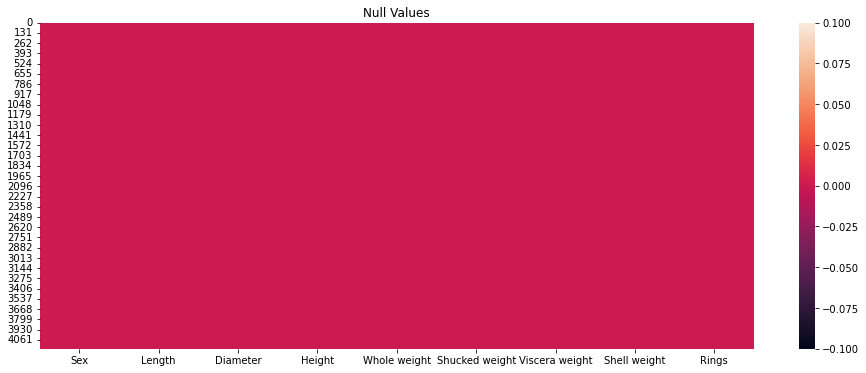

In [10]:
plt.figure(figsize=[16,6])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

So by visualizing i can notice there is no null values in my dataset.

In [11]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

Here i can see all the unique values in Rings column.

In [12]:
df.loc[df['Rings'] == " "]

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


Here by i can say there is no empty observations in Rings column.

In [13]:
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

I can see the unique value count of Rings column.

# Feature Engineering:

In [14]:
# Target column analysis:
print("Value Count of Rings Column")
print(df.Rings.value_counts())
print("\nPercentage of Rings Column")
print(df.Rings.value_counts(normalize = True))

Value Count of Rings Column
9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

Percentage of Rings Column
9     0.164951
10    0.151784
8     0.135983
11    0.116591
7     0.093608
12    0.063921
6     0.062006
13    0.048599
14    0.030165
5     0.027532
15    0.024659
16    0.016040
17    0.013886
4     0.013646
18    0.010055
19    0.007661
20    0.006225
3     0.003591
21    0.003352
23    0.002155
22    0.001436
27    0.000479
24    0.000479
1     0.000239
26    0.000239
29    0.000239
2     0.000239
25    0.000239
Name: Rings, dtype: float64


I can observe the percentage of each observation in Rings column.

In [15]:
print(len(df.Rings.unique()))

28


So there are 28 unique counts in Rings column.

In [16]:
#Small Feature Engineering, Deriving Age from Rings Column, Age = Rings + 1.5.
df['Age'] = df['Rings'] + 1.5
df['Age']

0       16.5
1        8.5
2       10.5
3       11.5
4        8.5
        ... 
4172    12.5
4173    11.5
4174    10.5
4175    11.5
4176    13.5
Name: Age, Length: 4177, dtype: float64

So now my target is to find Rings and i have extracted Age column from Rings column. Since Age is a continuous type of data it's a regression problem.

In [17]:
df['Age'].unique()

array([16.5,  8.5, 10.5, 11.5,  9.5, 21.5, 17.5, 20.5, 15.5, 12.5, 13.5,
       19.5, 14.5,  6.5,  5.5,  7.5, 22.5, 18.5, 23.5,  2.5,  4.5, 27.5,
       24.5, 30.5,  3.5, 28.5, 26.5, 25.5])

I can notice all the unique count of Age column.

In [18]:
df['Age'].value_counts()

10.5    689
11.5    634
9.5     568
12.5    487
8.5     391
13.5    267
7.5     259
14.5    203
15.5    126
6.5     115
16.5    103
17.5     67
18.5     58
5.5      57
19.5     42
20.5     32
21.5     26
4.5      15
22.5     14
24.5      9
23.5      6
28.5      2
25.5      2
2.5       1
27.5      1
30.5      1
3.5       1
26.5      1
Name: Age, dtype: int64

Here by i can see value count of Age column.

In [33]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


This is the new dataset with new column Age which i have extracted using Feature Engineering technique.

In [34]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,11.433684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,2.500000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,9.500000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,10.500000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,12.500000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,30.500000


Here i can see many information like count of each column and since all the count values of all columns are 4177 so there is no null values in my dataset.And the minimum maximum values can be seen over there.And also mean and standard deviation of each column.

In [35]:
df.skew()

Length           -0.639873
Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Age               1.114102
dtype: float64

All the columns are skewed.

# Visualization:

# Univariate analysis:

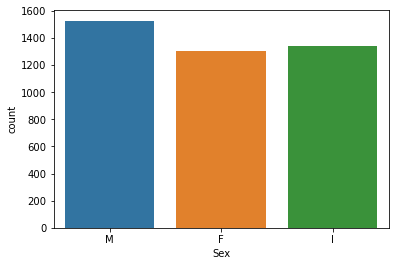

In [36]:
sns.countplot(df['Sex']);

I can say that from the bar plot that the number of males is greater than that of infant and female.

<AxesSubplot:xlabel='Length', ylabel='Density'>

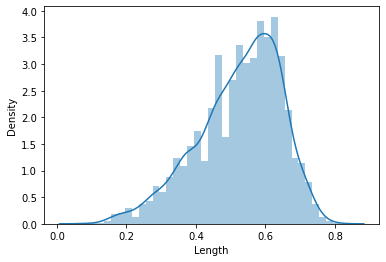

In [37]:
sns.distplot(df['Length'])

I can say that the Length column is little skewed.

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

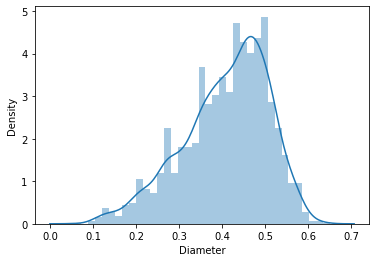

In [38]:
sns.distplot(df['Diameter'])

Here Diameter column is also bit skewed.

<AxesSubplot:xlabel='Height', ylabel='Density'>

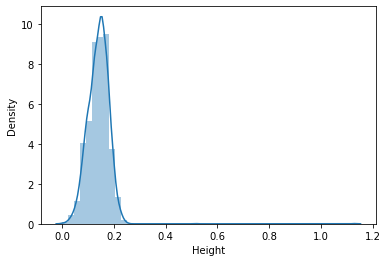

In [39]:
sns.distplot(df['Height'])

Height column is highly skewed.

<AxesSubplot:xlabel='Whole weight', ylabel='Density'>

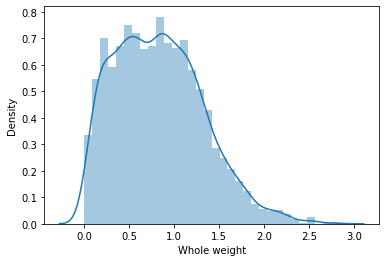

In [40]:
sns.distplot(df['Whole weight'])

It also looks little skewed.

<AxesSubplot:xlabel='Shucked weight', ylabel='Density'>

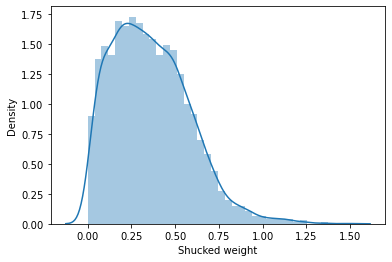

In [41]:
sns.distplot(df['Shucked weight'])

It is also skewed.

<AxesSubplot:xlabel='Viscera weight', ylabel='Density'>

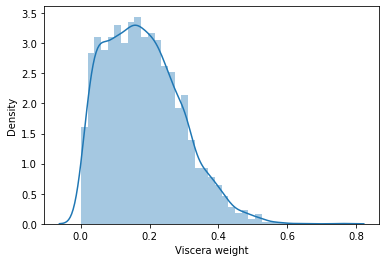

In [42]:
sns.distplot(df['Viscera weight'])

Viscera weight also looks skewed.

<AxesSubplot:xlabel='Shell weight', ylabel='Density'>

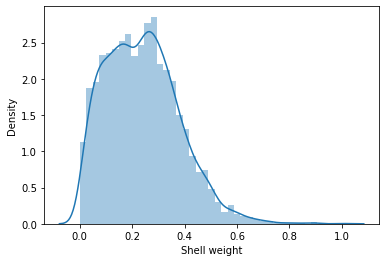

In [43]:
sns.distplot(df['Shell weight'])

It is also skewed.

<AxesSubplot:xlabel='Rings', ylabel='Density'>

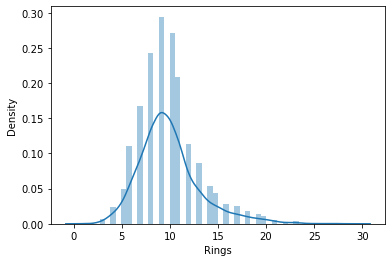

In [44]:
sns.distplot(df['Rings'])

Rings is also skewed.

<AxesSubplot:xlabel='Age', ylabel='Density'>

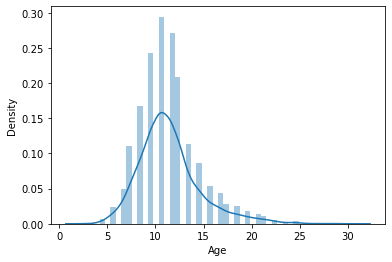

In [45]:
sns.distplot(df['Age'])

Age is also skewed.

# Bivariate analysis:

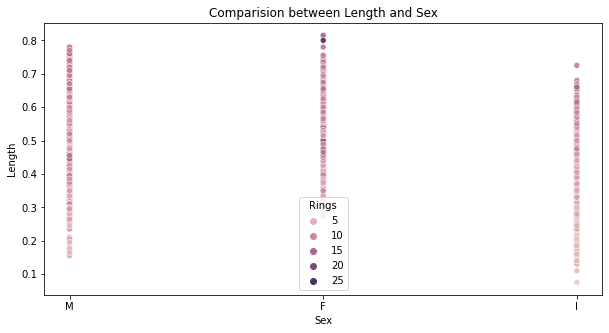

In [46]:
plt.figure(figsize=[10,5])
plt.title('Comparision between Length and Sex')
sns.scatterplot(df['Sex'],df['Length'],hue=df["Rings"]);

I can observe there are some outliers.And the distribution of Length with Sex.

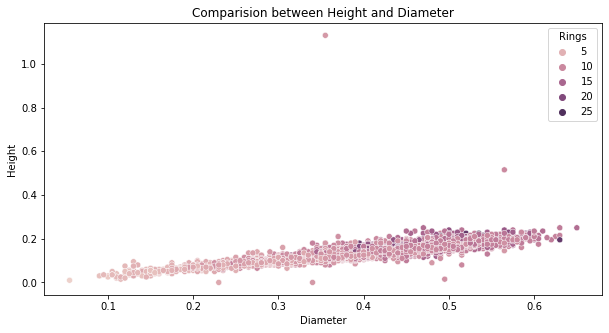

In [47]:
plt.figure(figsize=[10,5])
plt.title('Comparision between Height and Diameter')
sns.scatterplot(df['Diameter'],df['Height'],hue=df["Rings"]);

As the diameter is incresing the Height is increasing a bit with increase in Rings.

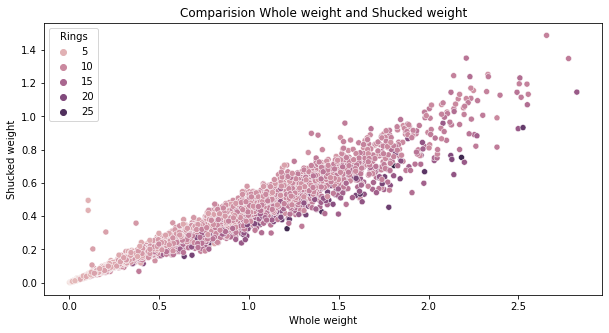

In [48]:
plt.figure(figsize=[10,5])
plt.title('Comparision Whole weight and Shucked weight')
sns.scatterplot(df['Whole weight'],df['Shucked weight'],hue=df["Rings"]);

It is showing linearity in graph which means as the Whole weight increases the shucked weight is also increasing with increase in Rings.

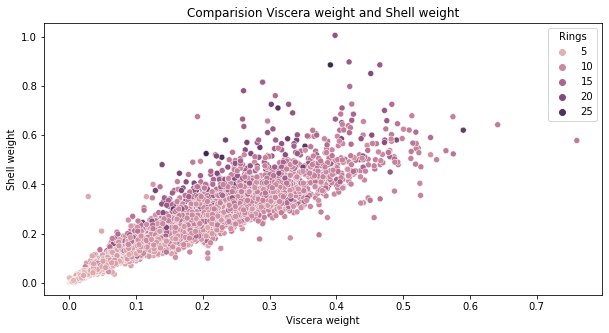

In [49]:
plt.figure(figsize=[10,5])
plt.title('Comparision Viscera weight and Shell weight')
sns.scatterplot(df['Viscera weight'],df['Shell weight'],hue=df["Rings"]);

It's also showing a positive increase like increase in Shell weight will increase Viscera weight.

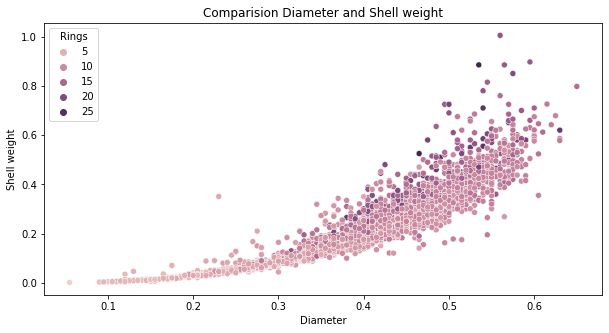

In [50]:
plt.figure(figsize=[10,5])
plt.title('Comparision Diameter and Shell weight')
sns.scatterplot(df['Diameter'],df['Shell weight'],hue=df["Rings"]);

Here as the diameter increases shell weight is also increasing with increase in Rings.

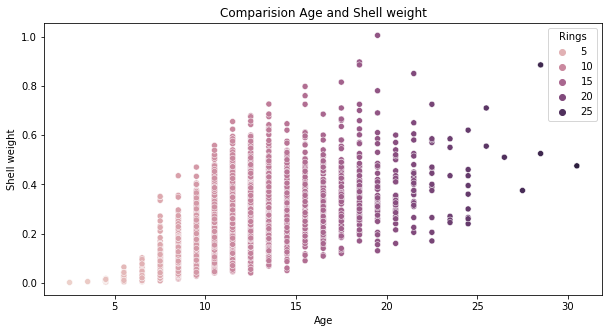

In [52]:
plt.figure(figsize=[10,5])
plt.title('Comparision Age and Shell weight')
sns.scatterplot(df['Age'],df['Shell weight'],hue=df["Rings"]);

As the Age is increasing Shell weight is also increasing with Rings.

# Multivariate analysis:

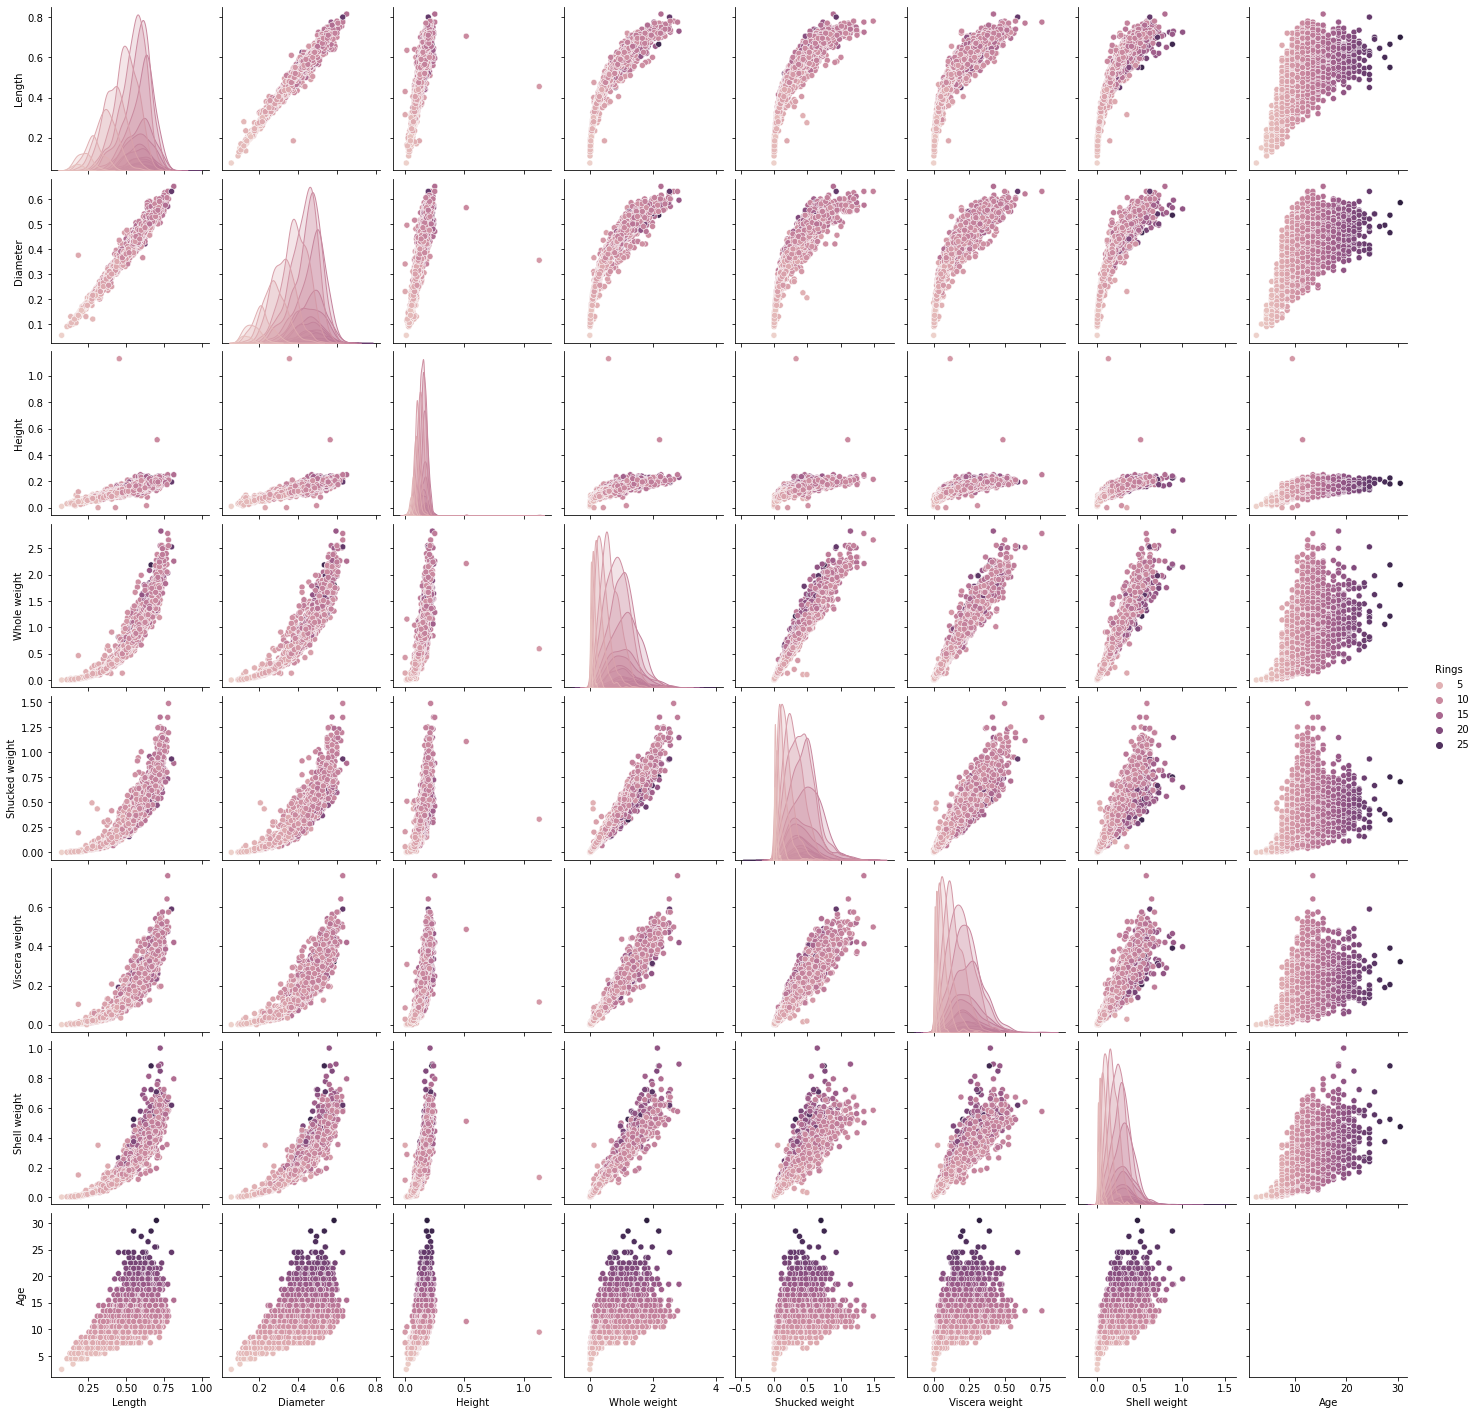

In [53]:
sns.pairplot(df,hue="Rings")

By visualizing we can see the relations between each pair of features in the dataset.

# Correlation Matrix using heat map:

In [55]:
df.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000
Age,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,1.000000


I can see the correlation of each feature with all other features.But it will be difficult to analyse like this so let me use visualization technique to get better vision on my data.

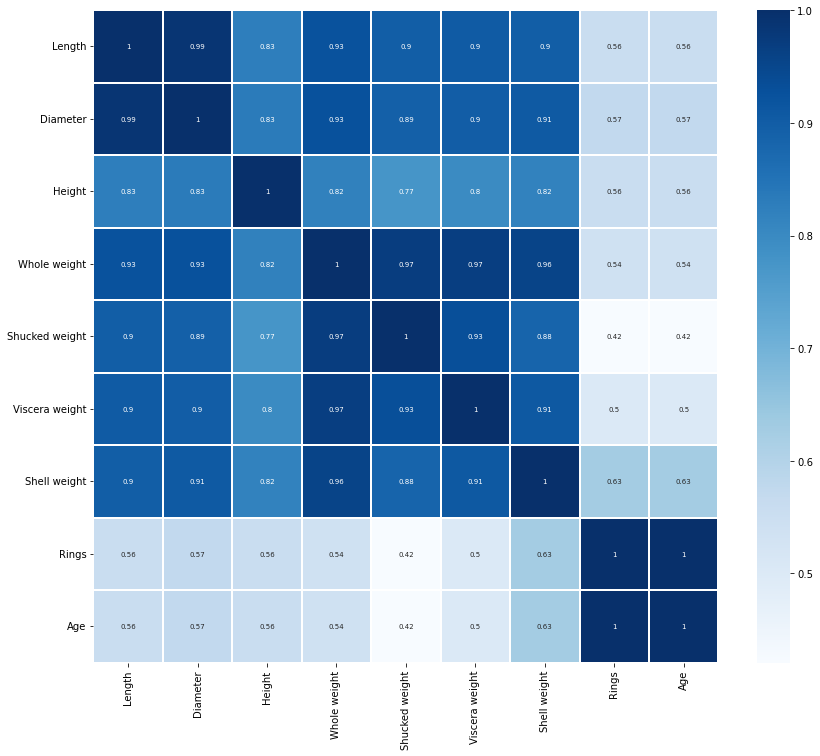

In [56]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="Blues",annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

My target Rings is highly correlated with

Length

Diameter

Height

Whole weight

Viscera weigth

Shell weight

Age

But has some correlation with Shucked weight.

Shell weight and whole weigth are higly correlated.

Shucked weight and whole weigth are higly correlated.

Viscera weight and whole weigth are higly correlated.

Length and Diameter are higly correlated.

In [57]:
cor['Rings'].sort_values(ascending=True)

Shucked weight    0.420884
Viscera weight    0.503819
Whole weight      0.540390
Length            0.556720
Height            0.557467
Diameter          0.574660
Shell weight      0.627574
Rings             1.000000
Age               1.000000
Name: Rings, dtype: float64

I can notice Shucked weight is very less correlated and Shell weight,Age is higly correlated with target variable.

# Visualisation of Correlation using bar plot:

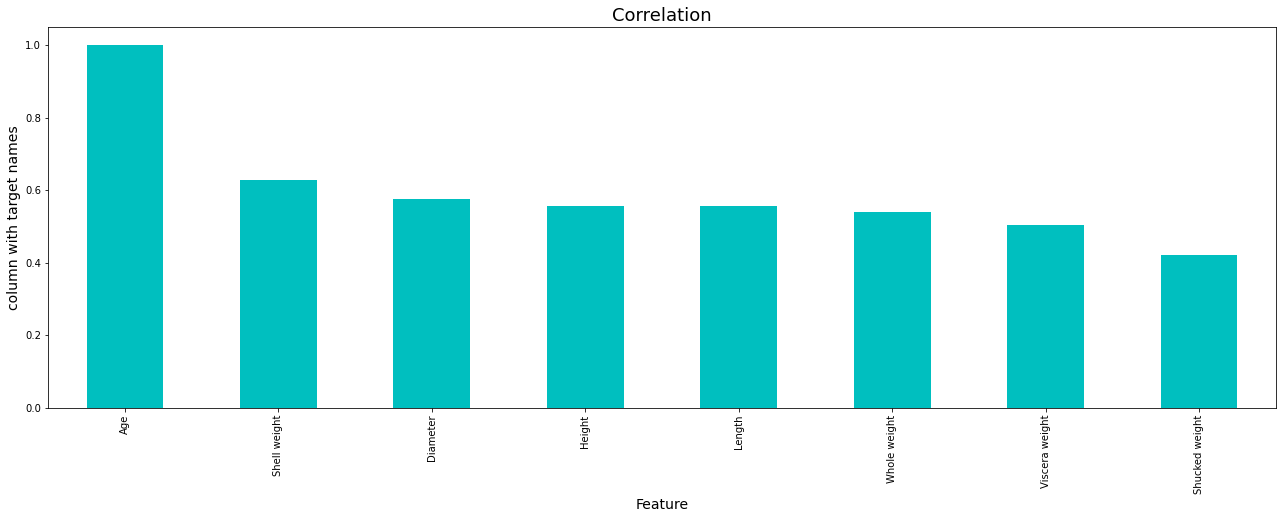

In [58]:
plt.figure(figsize=(22,7))
df.corr()['Rings'].sort_values(ascending=False).drop(['Rings']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

I can notice all the columns are with good correlation on target variable.

# Label Encoding:

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

I have encoded Sex column using LabelEncoding.

In [60]:
df['Sex'].unique()

array([2, 0, 1])

There are 3 unique values in Sex column.

In [61]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


This is the dataset after Encoding.

# Identifying outliers:

<AxesSubplot:>

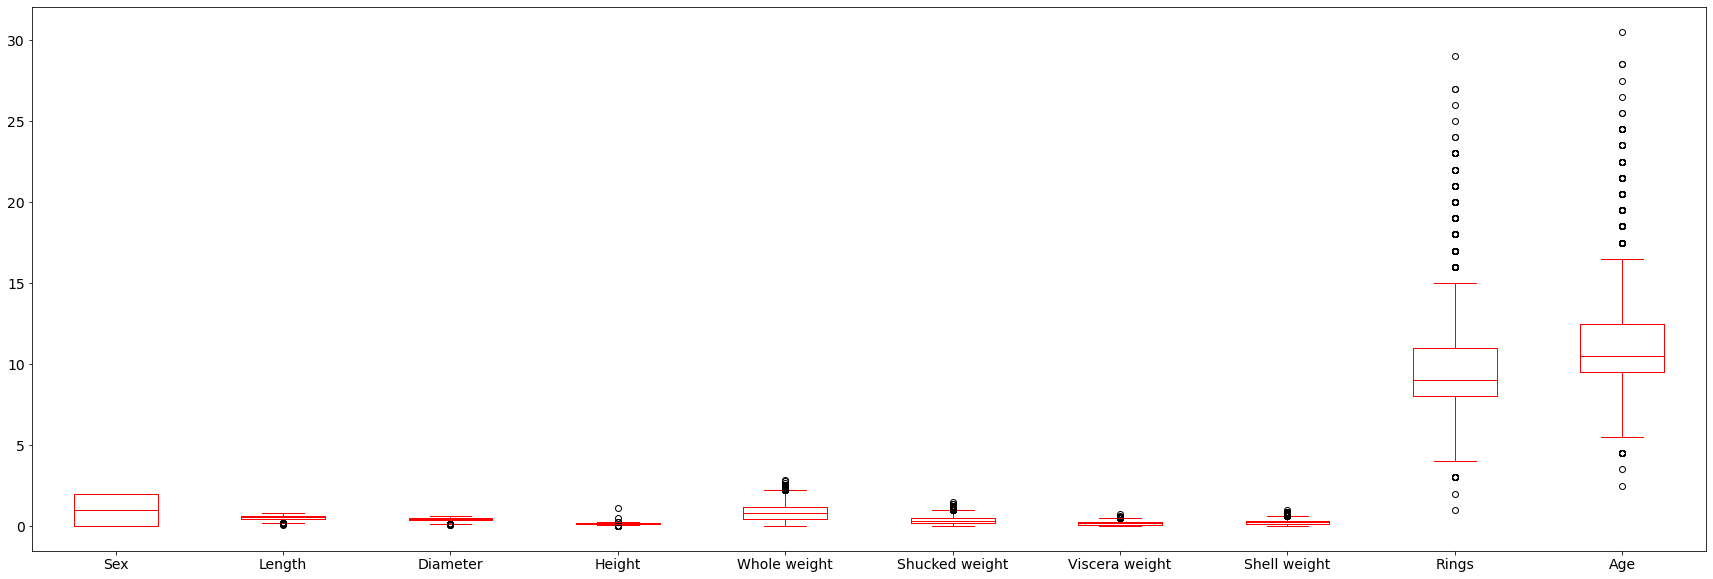

In [62]:
df.plot(kind='box',fontsize=14,figsize=(30,10),color='r')

By looking into the box plot there are outliers in column

Length

Diameter

Height

Whole weight

Shucked weight

Viscera weight

Shell weight

Age

But Outliers in Rings column will be kept as it is since i don't want to manupulate my target data.

# Removing outliers:

In [63]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Age'],
      dtype='object')

# i) Zscore method:

In [64]:
dfOutliers = df[['Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Age']]

In [65]:
from scipy.stats import zscore
z=np.abs(zscore(dfOutliers))
df_new=df[(z<3).all(axis=1)]
df_new

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7,8.5
...,...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10,11.5


I have removed all outliers and stored new data set as df_new.

In [66]:
df_new.shape

(4027, 10)

The shape of new dataset is 4027 rows and 10 columns.

In [67]:
df.shape

(4177, 10)

Shape of old dataset.

In [68]:
dataloss=(((4177-4027)/4177)*100)
dataloss

3.5910940866650707

The percentage of data loss in Zscore method to remove outliers is 3.59% i.e., less than 10%.I can proceed with this but let me check with IQR once.

# ii) IQR method:

In [69]:
Q1=dfOutliers.quantile(0.25)
Q3=dfOutliers.quantile(0.75)
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

Formula and coding for IQR method.I have removed outliers using IQR method.

In [70]:
df_1.shape

(3781, 10)

The shape of new dataset after removing outliers using IQR method is 3781 rows and 10 columns.

In [71]:
df.shape

(4177, 10)

This is the shape of old dataset.

In [72]:
dataloss=(((4177-3781)/4177)*100)
dataloss

9.480488388795786

Using IQR to remove outliers i'm getting 9.48% which is more than Zscore so let me keep Zscore method to remove outliers and move further.

# Checking for skewness:

In [73]:
df_new.skew()

Sex              -0.094886
Length           -0.623076
Diameter         -0.598650
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
Age               0.725464
dtype: float64

I can see skewness in

Length

Diameter

Age

Let me remove skewness in Length, Diameter and Age columns but not in target column.

# Removing skewness using yeo-johnson method:

In [74]:
features=['Length','Diameter','Age']

Assigning variable features as the list of columns with skewness.

In [75]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box_cox' or 'yeo-johnson'\n"

coding for yeo-johnson to remove skewness.

In [76]:
df_new[features] = scaler.fit_transform(df_new[features].values)

Removed skewness using yeo-johnson mathod.

In [77]:
df_new[features]

,Length,Diameter,Age
0,-0.684451,-0.543379,1.672007
1,-1.411739,-1.401132,-0.981224
2,-0.046219,0.037163,-0.158989
3,-0.799651,-0.543379,0.201995
4,-1.530577,-1.474343,-0.981224
...,...,...,...
4172,0.289495,0.390420,0.536342
4173,0.545081,0.269661,0.201995
4174,0.651129,0.705921,-0.158989
4175,0.926064,0.837713,0.201995


These are the features after removing skewness.

<AxesSubplot:xlabel='Length', ylabel='Density'>

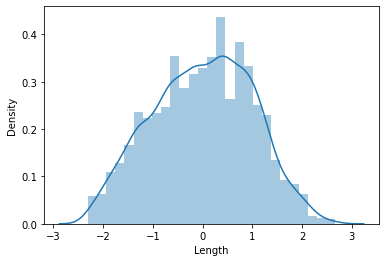

In [79]:
sns.distplot(df_new['Length'])

Now the column Length looks almost normal compared to old one.

<AxesSubplot:xlabel='Diameter', ylabel='Density'>

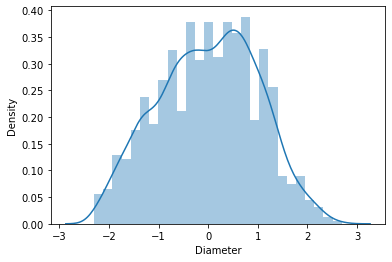

In [80]:
sns.distplot(df_new['Diameter'])

Here also the column Diameter looks almost normal compared to old one.

<AxesSubplot:xlabel='Age', ylabel='Density'>

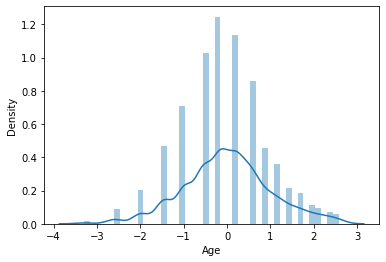

In [85]:
sns.distplot(df_new['Age'])

Age also looks normal compared to old one.

In [86]:
df_new.skew()

Sex              -0.094886
Length           -0.082985
Diameter         -0.080956
Height           -0.244251
Whole weight      0.334204
Shucked weight    0.458295
Viscera weight    0.437116
Shell weight      0.349471
Rings             0.725464
Age               0.000891
dtype: float64

Looks the skewness is removed now.

# Preprocessing:

In [88]:
x = df_new.drop("Rings",axis=1)
y = df_new["Rings"]

Just assigned x as all features except target and y as target variable.

In [89]:
from sklearn.preprocessing import StandardScaler

ssc=StandardScaler()
x = pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

Using StandardScaler i have scaled the data.

In [90]:
x

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,1.159698,-0.684451,-0.543379,-1.166207,-0.633156,-0.603733,-0.723057,-0.630659,1.672007
1,1.159698,-1.411739,-1.401132,-1.301806,-1.265644,-1.209410,-1.231104,-1.256033,-0.981224
2,-1.285382,-0.046219,0.037163,-0.081420,-0.275805,-0.448680,-0.331135,-0.161629,-0.158989
3,1.159698,-0.799651,-0.543379,-0.352617,-0.628771,-0.647342,-0.597255,-0.591574,0.201995
4,-0.062842,-1.530577,-1.474343,-1.573003,-1.310587,-1.257865,-1.318198,-1.373290,-0.981224
...,...,...,...,...,...,...,...,...,...
4022,-1.285382,0.289495,0.390420,0.732171,0.184584,0.101275,0.612382,0.143240,0.536342
4023,1.159698,0.545081,0.269661,-0.081420,0.357779,0.435609,0.375293,0.233138,0.201995
4024,1.159698,0.651129,0.705921,1.816959,0.818169,0.854737,1.081721,0.604453,-0.158989
4025,-1.285382,0.926064,0.837713,0.325376,0.639493,0.881387,0.825278,0.510647,0.201995


# Finding Best random_state:

In [91]:
#importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import r2_score

In [92]:
from sklearn.tree import DecisionTreeRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = DecisionTreeRegressor()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  1.0  on Random_state  1


Best accuracy is  1.0  on Random_state  1.

I have found the best accuracy and Random state.

In [93]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

Created train test split data.

# Regression Algorithms:

In [94]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import ElasticNet
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# i) Linear Regression:

In [95]:
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.9803738334019212


I got 98.03% accuracy in Linear Regression model.

# ii) Random Forest Regressor:

In [96]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.9999996235601982


I am getting 99.99% accuracy in Random Forest Regression model.

# iii) Support Vector Regressor:

In [97]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.9966539990244214


I am getting 99.66% accuracy in SupportVectorRegressor model.

# iv) K-Neighbors Regressor:

In [98]:
knn=KNN()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 0.9737621458141181


I am getting 97.37% accuracy in K-Neighbors Regressor.

# v) Lasso Regression:

In [99]:
#importing necessary library
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso,Ridge

In [100]:
parameters={'alpha':[0.0001,0.001,0.01,0.1,1,10],'random_state':list(range(0,100))}
ls=Lasso()
df_new=GridSearchCV(ls,parameters)
df_new.fit(x_train,y_train)
print(df_new.best_params_)

{'alpha': 0.0001, 'random_state': 0}


I got the best parameters for Lasso Regression.

In [101]:
ls=Lasso(alpha=0.0001,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
print('R2_Score:',r2_score(y_test,pred_ls))

R2_Score: 0.9803786759592215


Using Lasso Regression i'm getting 98.03% accuracy.

# vi) Decision Tree Regressor:

In [102]:
from sklearn.tree import DecisionTreeRegressor
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,pred))

R2_Score: 1.0


I am getting 100% accuracy in DecisionTreeRegressor model.

# Cross Validation Score:

In [103]:
#importing necessary libraries
from sklearn.model_selection import cross_val_score

In [104]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.9764466442666316


In [105]:
print(cross_val_score(RFR,x,y,cv=5).mean())

0.9999999914732465


In [106]:
print(cross_val_score(svr,x,y,cv=5).mean())

0.9952919739851348


In [107]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.9699297965791358


In [108]:
print(cross_val_score(ls,x,y,cv=5).mean())

0.976452206239794


In [109]:
print(cross_val_score(DTR,x,y,cv=5).mean())

1.0


So by looking into the difference between Cross validation score and model r2_score i found that DecisionTreeRegressor is the best model with 100% accuracy.

# Hyper parameter tuning:

In [111]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [112]:
parameter = {'criterion':["mse","mae","poisson"], 'random_state':[1,10,100,1000], 'max_depth':[4,5,7,8,9], 'max_features':["auto","sqrt","log2"] }

Giving DecisionTreeRegressors Parameters.

In [113]:
GCV=GridSearchCV(DecisionTreeRegressor(),parameter,cv=5)

Running Grid Search CV for DTR with cv=5 and above parameters.

In [114]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'mae', 'poisson'],
                         'max_depth': [4, 5, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'random_state': [1, 10, 100, 1000]})

Tuning my model using GridSearch CV.

In [116]:
GCV.best_params_

{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'random_state': 1}

Got best parameters.

In [117]:
Final_mod=DecisionTreeRegressor(criterion='mse',max_depth=5,max_features='auto',random_state=1)
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=r2_score(y_test, pred)

print(acc*100)

100.0


After tuning my DTR model using Grid Search CV i got my final model accuracy as 100%!!!!!!!!.

# Saving the model:

In [118]:
import joblib
joblib.dump(Final_mod,"AbaloneCase.pkl")

['AbaloneCase.pkl']